# Validação do modelo de Churn
* Aplicado o Recente em todos e utilizando o cálculo de períodos.
---

**Autor(a):** Sabrina Bruni de Souza Faria

## Importando Bibliotecas

In [1]:
import pandas as pd
import csv
from funcoesAuxiliares import *

## Leitura dos dados

In [2]:
df = pd.read_csv('Arquivos/TesteTreinoChurnTrans.csv')
df.head(5)

,id_cliente,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,resultado
0,2378,0.290557,0.991526,0.990924,0.289474,não churn
1,576,0.398677,0.997203,0.998403,0.394737,não churn
2,704,0.259568,0.997093,0.998367,0.256579,não churn
3,3818,0.300109,0.997203,0.998403,0.296053,não churn
4,1972,0.371964,0.998958,0.999549,0.368421,não churn


In [3]:
df.describe()

,id_cliente,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,2786.067556,0.802617,0.999968,0.999981,0.630798
std,2313.811984,0.198231,0.000312,0.000261,0.189418
min,1.000000,0.198918,0.988417,0.987959,0.141447
25%,1182.750000,0.658043,1.000000,1.000000,0.459704
50%,2368.000000,0.901251,1.000000,1.000000,0.674342
75%,3552.250000,0.956262,1.000000,1.000000,0.786184
max,11382.000000,0.997424,1.000000,1.000000,0.971875


## Variável de decisão

In [4]:
limite = 0.5

## Ajustando os dados

In [5]:
df["resultado"] = df['resultado'].apply(lambda x: 1.0 if x == "churn" else 0.0)
df["churnLinear"] = df["churnLinear"].apply(lambda x: 1.0 if x >= limite else 0.0)
df["churnExponencial_2"] = df["churnExponencial_2"].apply(lambda x: 1.0 if x >= limite else 0.0)
df["churnExponencial_e"] = df["churnExponencial_e"].apply(lambda x: 1.0 if x >= limite else 0.0)
df["churnRecente"] = df["churnRecente"].apply(lambda x: 1.0 if x >= limite else 0.0)
df.head(5)

,id_cliente,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,resultado
0,2378,0.0,1.0,1.0,0.0,0.0
1,576,0.0,1.0,1.0,0.0,0.0
2,704,0.0,1.0,1.0,0.0,0.0
3,3818,0.0,1.0,1.0,0.0,0.0
4,1972,0.0,1.0,1.0,0.0,0.0


## Salvando o dataframe de churn e resultado ajustados em um arquivo CSV

In [6]:
df.to_csv( "Arquivos/TesteTreinoChurnAjustadoTrans.csv", index = False, header = True, quoting = csv.QUOTE_NONNUMERIC )

## Visualizando Estatísticas Descritivas

In [7]:
df.describe()

,id_cliente,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,resultado
count,4500.000000,4500.000000,4500.0,4500.0,4500.000000,4500.000000
mean,2786.067556,0.884000,1.0,1.0,0.707778,0.006667
std,2313.811984,0.320261,0.0,0.0,0.454834,0.081386
min,1.000000,0.000000,1.0,1.0,0.000000,0.000000
25%,1182.750000,1.000000,1.0,1.0,0.000000,0.000000
50%,2368.000000,1.000000,1.0,1.0,1.000000,0.000000
75%,3552.250000,1.000000,1.0,1.0,1.000000,0.000000
max,11382.000000,1.000000,1.0,1.0,1.000000,1.000000


## Visualizando a proporção de Churns

In [8]:
# Aplicar a função a cada coluna
df.apply(contar_zeros_uns)

,id_cliente,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,resultado
zeros,0,522,0,0,1315,4470
uns,1,3978,4500,4500,3185,30


## Validando os Modelos

In [9]:
real = df["resultado"]
linear, exp2, expE, recente = df["churnLinear"], df["churnExponencial_2"], df["churnExponencial_e"], df["churnRecente"]

R² = [-131.48322147651012, -149.00000000000006, -149.00000000000006, -104.87248322147654]


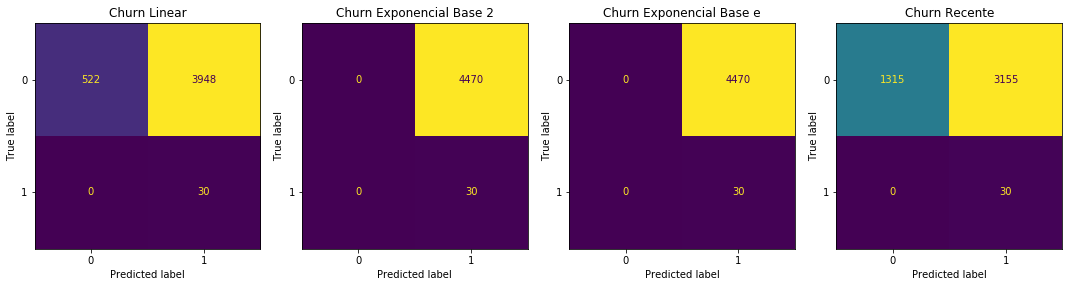

In [10]:
r2, CM = validacaoR2MatrizConfusao(
            real, 
            predict = [linear, exp2, expE, recente], 
            titulos = ["Churn Linear", "Churn Exponencial Base 2", "Churn Exponencial Base e", "Churn Recente"], 
            tamanhos = (15,8)
            )

In [11]:
print("Churn Linear:")
calculaValoresAvaliacao(linear, real)
print("\n\n")
print("Churn Exponencial Base 2:")
calculaValoresAvaliacao(exp2, real)
print("\n\n")
print("Churn Exponencial Base e:")
calculaValoresAvaliacao(expE, real)
print("\n\n")
print("Churn Recente:")
calculaValoresAvaliacao(recente, real)

Churn Linear:
Acurácia: 12.27%

Classe     Precisão     Revocação    F1-Score    
---------------------------------------------
0.0        100.00       11.68        20.91       
1.0        0.75         100.00       1.50        



Churn Exponencial Base 2:
Acurácia: 0.67%

Classe     Precisão     Revocação    F1-Score    
---------------------------------------------
1.0        0.67         100.00       1.32        



Churn Exponencial Base e:
Acurácia: 0.67%

Classe     Precisão     Revocação    F1-Score    
---------------------------------------------
1.0        0.67         100.00       1.32        



Churn Recente:
Acurácia: 29.89%

Classe     Precisão     Revocação    F1-Score    
---------------------------------------------
0.0        100.00       29.42        45.46       
1.0        0.94         100.00       1.87        
